# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [30]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras.models import load_model

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [2]:
# Storing the path of the data file from the Google drive
#path = '/content/drive/MyDrive/Facial_emotion_images.zip'
path = '../Downloads/Facial_emotion_images.zip'
# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

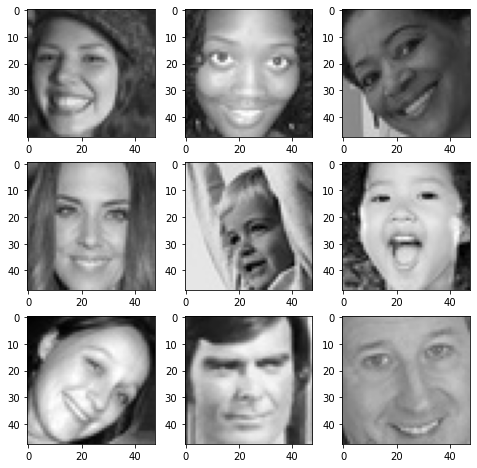

In [3]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: The distinguishing feature for this category could be the opened mouth or up-curved lips**

### **Sad**

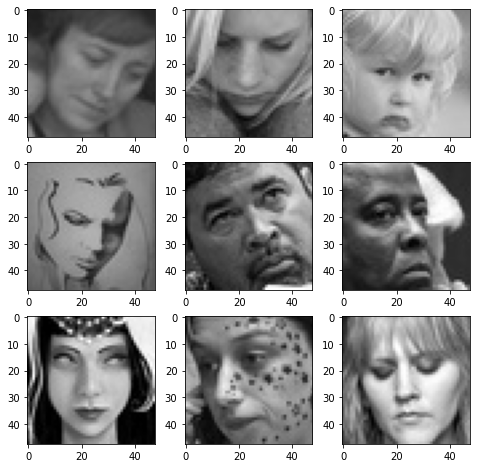

In [5]:
# Write your code to visualize images from the class 'sad'.
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:The distinguishing feature for this category could be the eyes: either closed or directed down or somewhere else, not towards the camera; the corners of lips can be curved downwards**

### **Neutral**

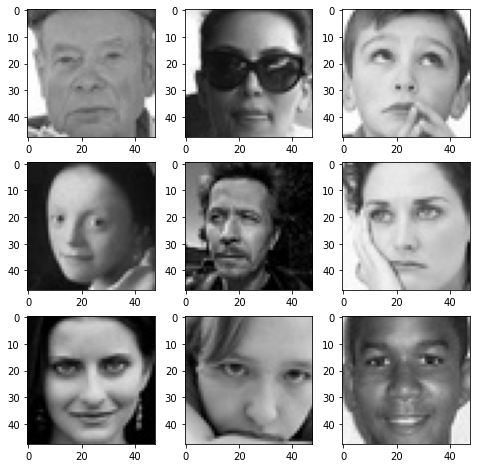

In [6]:
# Write your code to visualize images from the class 'neutral'.
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: The position of lips and eyes corresponding to the relaxed face could help to distinguish the category of neutral face from the others**

### **Surprised**

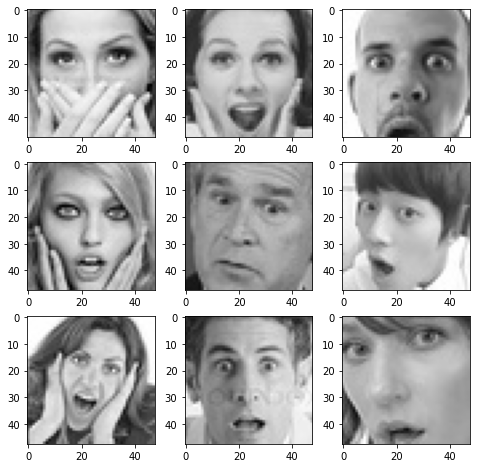

In [7]:
# Write your code to visualize images from the class 'surprise'.
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:Here we can see the distinguishing feature: opened wide mouth and eyes**

## **Checking Distribution of Classes**

In [4]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))# Write the code to get the number of training images from the class 'sad'.
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))# Write the code to get the number of training images from the class 'neutral'.
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))# Write the code to get the number of training images from the class 'surprise'.
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


In [5]:
# Getting count of images in each folder within our training path
num_happy2 = len(os.listdir(folder_path + "validation/happy"))
print("Number of images in the class 'happy':   ", num_happy2)

num_sad2 = len(os.listdir(folder_path + "validation/sad"))# Write the code to get the number of training images from the class 'sad'.
print("Number of images in the class 'sad':   ", num_sad2)

num_neutral2 = len(os.listdir(folder_path + "validation/neutral"))# Write the code to get the number of training images from the class 'neutral'.
print("Number of images in the class 'neutral':   ", num_neutral2)

num_surprise2 = len(os.listdir(folder_path + "validation/surprise"))# Write the code to get the number of training images from the class 'surprise'.
print("Number of images in the class 'surprise':   ", num_surprise2)

Number of images in the class 'happy':    1825
Number of images in the class 'sad':    1139
Number of images in the class 'neutral':    1216
Number of images in the class 'surprise':    797


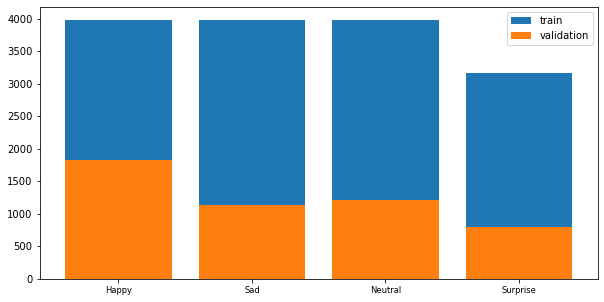

In [42]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

data2 = {'Happy': num_happy2, 'Sad': num_sad2, 'Neutral': num_neutral2, 'Surprise' : num_surprise2}

df2 = pd.Series(data2)

plt.bar(range(len(df)), df.values, align = 'center', label = 'train')
plt.bar(range(len(df2)), df2.values, align = 'center', label = 'validation')

plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.legend(loc='upper right')
plt.show()

**Observations and Insights:  It can be observed that except the 'Surprise' category, all other types are almost of the same size, between 3 and 4 thousands of images. Overall, the distribution of classes can be considered as approximately balanced, i.e. there is no over-represented or under-represented class.**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [75]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [67]:
# Initializing a Sequential Model
model1 = Sequential()

model1.add(Conv2D(64, (2, 2), padding = "same", input_shape = (48, 48, 3), activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = 'relu'))

model1.add(Dropout(0.4))

model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 64)        832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 32)        8224      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 32)       

### **Compiling and Training the Model**

In [68]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
'''
if os.path.exists("model1.h5"):
    print("model exists")
    model1 = load_model("model1.h5")
'''
epochs = 20

In [69]:
# Write your code to compile your model1. Use categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 
model1.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [70]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = model1.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)

Epoch 1/20
473/473 [==============================] - 26s 50ms/step - loss: 1.3869 - accuracy: 0.2779 - val_loss: 1.2697 - val_accuracy: 0.4217

Epoch 00001: val_loss improved from inf to 1.26968, saving model to ./model1.h5
Epoch 2/20
473/473 [==============================] - 24s 49ms/step - loss: 1.2445 - accuracy: 0.4224 - val_loss: 1.1339 - val_accuracy: 0.5192

Epoch 00002: val_loss improved from 1.26968 to 1.13390, saving model to ./model1.h5
Epoch 3/20
473/473 [==============================] - 25s 50ms/step - loss: 1.1515 - accuracy: 0.4827 - val_loss: 1.0319 - val_accuracy: 0.5634

Epoch 00003: val_loss improved from 1.13390 to 1.03186, saving model to ./model1.h5
Epoch 4/20
473/473 [==============================] - 25s 50ms/step - loss: 1.0739 - accuracy: 0.5305 - val_loss: 0.9690 - val_accuracy: 0.5959

Epoch 00004: val_loss improved from 1.03186 to 0.96904, saving model to ./model1.h5
Epoch 5/20
473/473 [==============================] - 25s 49ms/step - loss: 1.0385 - acc

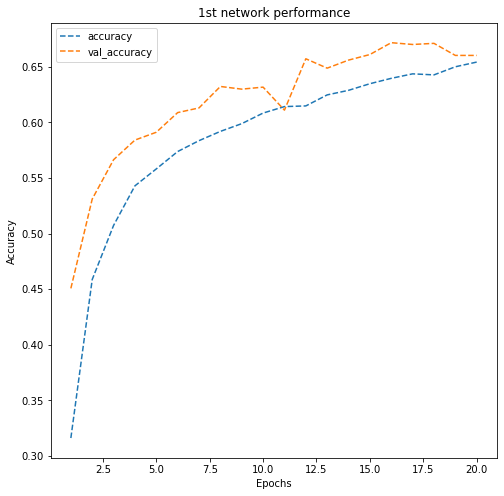

In [28]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 1 + len(history.history['loss']))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()
plt.title('1st network performance')
plt.show()


### **Evaluating the Model on the Test Set**

In [81]:
#model1 = load_model("model1.h5")
# Write your code to evaluate your model on test data.
#model1.evaluate(validation_set)
model1.evaluate(test_set)

1/1 [==============================] - 0s 252ms/step - loss: 0.9645 - accuracy: 0.5000


[0.9644861221313477, 0.5]

Found 4977 images belonging to 4 classes.
Validation Confusion Matrix from 1st model
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       373
           1       0.28      0.33      0.30       246
           2       0.25      0.24      0.25       250
           3       0.80      0.76      0.78       155

    accuracy                           0.52      1024
   macro avg       0.53      0.52      0.52      1024
weighted avg       0.54      0.52      0.53      1024



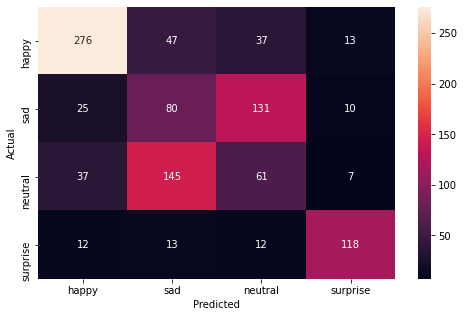

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "validation",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 1024,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)
print('Validation Confusion Matrix from 1st model')
# Write the name of your chosen model in the blank
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights: First model shows the similar accuracy performance as on train and validation dataset, in the range 65% - 70%, which means that it has a good generalization**

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [14]:
# Creating sequential model
model2 = Sequential()
 
model2.add(Conv2D(256, (2, 2), padding = "same", input_shape = (48, 48, 3), activation='relu'))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (2, 2), padding = "same", activation='relu'))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (2, 2), padding = "same", activation='relu'))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model2.add(BatchNormalization())

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))

model2.add(Dense(128, activation='relu'))

model2.add(Dense(4, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 256)       3328      
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 256)       1024      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       131200    
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 24, 24, 128)      

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          ) # Write your code here. You may play around with the hyperparameters if you wish.

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001) # Write your code here. You may play around with the hyperparameters if you wish.

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [16]:
model2.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'. 

In [17]:
history = model2.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)# Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.

Epoch 1/20
473/473 [==============================] - 79s 160ms/step - loss: 1.3307 - accuracy: 0.3834 - val_loss: 1.2918 - val_accuracy: 0.4191

Epoch 00001: val_loss improved from inf to 1.29176, saving model to ./model2.h5
Epoch 2/20
473/473 [==============================] - 78s 159ms/step - loss: 1.0798 - accuracy: 0.5163 - val_loss: 1.0725 - val_accuracy: 0.5445

Epoch 00002: val_loss improved from 1.29176 to 1.07249, saving model to ./model2.h5
Epoch 3/20
473/473 [==============================] - 77s 158ms/step - loss: 0.9697 - accuracy: 0.5836 - val_loss: 0.9692 - val_accuracy: 0.5937

Epoch 00003: val_loss improved from 1.07249 to 0.96923, saving model to ./model2.h5
Epoch 4/20
473/473 [==============================] - 67s 136ms/step - loss: 0.9156 - accuracy: 0.6049 - val_loss: 0.9263 - val_accuracy: 0.6136

Epoch 00004: val_loss improved from 0.96923 to 0.92625, saving model to ./model2.h5
Epoch 5/20
473/473 [==============================] - 31s 63ms/step - loss: 0.8556 -

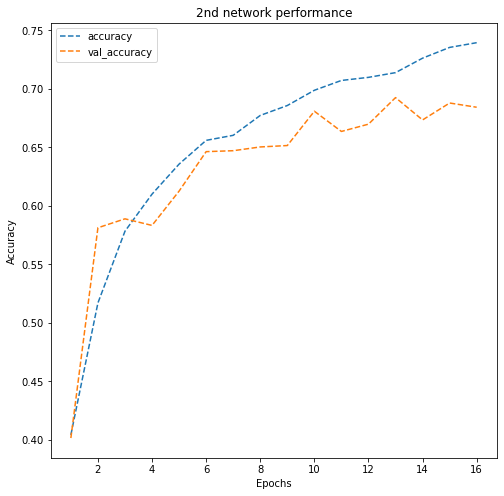

In [11]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 1 + len(history.history['loss']))]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()
plt.title('2nd network performance')
plt.show()

### **Evaluating the Model on the Test Set**

In [79]:
# Write your code to evaluate model's test performance
model2.evaluate(validation_set)
model2.evaluate(test_set)

4/4 [==============================] - 0s 34ms/step - loss: 0.7968 - accuracy: 0.6797


[0.7967752814292908, 0.6796875]

Found 128 images belonging to 4 classes.
Test Confusion Matrix from 2nd model
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        32
           1       0.25      0.22      0.23        32
           2       0.27      0.38      0.31        32
           3       0.96      0.72      0.82        32

    accuracy                           0.51       128
   macro avg       0.55      0.51      0.52       128
weighted avg       0.55      0.51      0.52       128



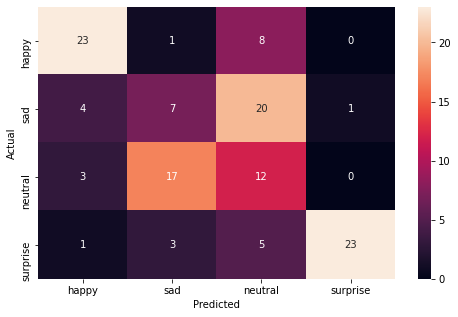

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'rgb',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)
print('Test Confusion Matrix from 2nd model')
# Write the name of your chosen model in the blank
pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights: Second model shows a little better performance as on train and validation dataset, in the range 68% - 70%, which means that it has a good generalization**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

### <u>**Proposed Approach**</u>

- **Potential techniques:** What different techniques should be explored?<br>
- **Overall solution design:** What is the potential solution design?<br>
- **Measures of success:** What are the key measures of success to compare different techniques?<br>

* The models show moderate performance, the accuracy is less than $70 \%$, so probably we need either try to explore different architectures and training regimes or require more quality for the images (the current size is $48 \times 48$, which is low and can affect on distinction of face emotions presented there) 
* The experiments with one color are provided below, it shows slightly worse performance, so using of 'rgb' mode is better for this task

# GrayScale experiments

In [44]:
batch_size  = 32
img_size = 48
picture_size = 48
folder_path = "Facial_emotion_images/"

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [6]:
#Initializing a Sequential Model
model1 = Sequential()

model1.add(Conv2D(64, (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model1.add(MaxPooling2D((2, 2)))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = 'relu'))

model1.add(Dropout(0.4))

model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]
if os.path.exists("model1.h5"):
    print('model exists')
    model1 = load_model("model1.h5")
epochs = 20
model1.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model exists


In [41]:
history = model1.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)

Epoch 1/20
473/473 [==============================] - 98s 201ms/step - loss: 0.8930 - accuracy: 0.6205 - val_loss: 0.8754 - val_accuracy: 0.6331

Epoch 00001: val_loss improved from inf to 0.87536, saving model to ./model1.h5
Epoch 2/20
473/473 [==============================] - 96s 196ms/step - loss: 0.8891 - accuracy: 0.6202 - val_loss: 0.8533 - val_accuracy: 0.6572

Epoch 00002: val_loss improved from 0.87536 to 0.85333, saving model to ./model1.h5
Epoch 3/20
473/473 [==============================] - 99s 201ms/step - loss: 0.8709 - accuracy: 0.6405 - val_loss: 0.8293 - val_accuracy: 0.6633

Epoch 00003: val_loss improved from 0.85333 to 0.82927, saving model to ./model1.h5
Epoch 4/20
473/473 [==============================] - 98s 202ms/step - loss: 0.8651 - accuracy: 0.6386 - val_loss: 0.8257 - val_accuracy: 0.6665

Epoch 00004: val_loss improved from 0.82927 to 0.82569, saving model to ./model1.h5
Epoch 5/20
473/473 [==============================] - 94s 193ms/step - loss: 0.8647 

In [39]:
model1.save("./model1.h5")

In [42]:
model1.evaluate(test_set)

4/4 [==============================] - 4s 42ms/step - loss: 0.8199 - accuracy: 0.6406


[0.8198727369308472, 0.640625]

In [19]:
model5 = Sequential()
 
model5.add(Conv2D(256, (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))

model5.add(BatchNormalization())

model5.add(LeakyReLU(0.1))

model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128, (2, 2), padding = "same", activation='relu'))

model5.add(BatchNormalization())

model5.add(LeakyReLU(0.1))

model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (2, 2), padding = "same", activation='relu'))

model5.add(BatchNormalization())

model5.add(LeakyReLU(0.1))

model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(32, (2, 2), padding = "same", activation='relu'))

model5.add(BatchNormalization())

model5.add(LeakyReLU(0.1))

model5.add(MaxPooling2D((2, 2)))

model5.add(Flatten())

model5.add(Dense(512, activation='relu'))

model5.add(Dense(128, activation='relu'))

model5.add(BatchNormalization())

model5.add(Dense(4, activation='softmax'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 256)       1280      
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 256)       1024      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       131200    
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 24, 24, 128)      

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model5.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          ) # Write your code here. You may play around with the hyperparameters if you wish.

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001) # Write your code here. You may play around with the hyperparameters if you wish.

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

model5.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model5.fit(train_set, validation_data = validation_set, callbacks = callbacks_list, epochs=epochs)# Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.

Epoch 1/20
473/473 [==============================] - 24s 45ms/step - loss: 1.3682 - accuracy: 0.3754 - val_loss: 1.4001 - val_accuracy: 0.2616

Epoch 00001: val_loss improved from inf to 1.40013, saving model to ./model5.h5
Epoch 2/20
473/473 [==============================] - 22s 45ms/step - loss: 1.1087 - accuracy: 0.5099 - val_loss: 1.0815 - val_accuracy: 0.5224

Epoch 00002: val_loss improved from 1.40013 to 1.08151, saving model to ./model5.h5
Epoch 3/20
473/473 [==============================] - 23s 46ms/step - loss: 1.0192 - accuracy: 0.5549 - val_loss: 1.3956 - val_accuracy: 0.4774

Epoch 00003: val_loss did not improve from 1.08151
Epoch 4/20
473/473 [==============================] - 23s 46ms/step - loss: 0.9691 - accuracy: 0.5802 - val_loss: 0.9841 - val_accuracy: 0.5825

Epoch 00004: val_loss improved from 1.08151 to 0.98413, saving model to ./model5.h5
Epoch 5/20
473/473 [==============================] - 23s 46ms/step - loss: 0.9123 - accuracy: 0.6080 - val_loss: 1.0866 

In [23]:
model5.evaluate(test_set)

4/4 [==============================] - 1s 48ms/step - loss: 0.8539 - accuracy: 0.6562


[0.8538679480552673, 0.65625]

Found 128 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        32
           1       0.26      0.31      0.28        32
           2       0.28      0.25      0.26        32
           3       1.00      0.62      0.77        32

    accuracy                           0.49       128
   macro avg       0.54      0.49      0.50       128
weighted avg       0.54      0.49      0.50       128



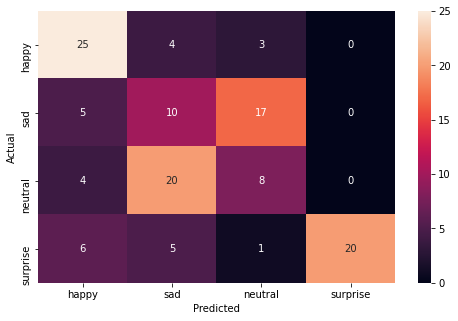

In [24]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model5.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()